
<div class="alert alert-info">

**This is a fixed-text formatted version of a Jupyter notebook**

- **Source files:**
[interactive-model-editing.ipynb](../../_static/notebooks/interactive-model-editing/interactive-model-editing.ipynb) |
[interactive-model-editing.py](../../_static/notebooks/interactive-model-editing/interactive-model-editing.py)

- **Environment:**
[env.yml](../../_static/notebooks/interactive-model-editing/env.yml)
</div>


## Recipe to show the interactively edit the Sky model on the notebook  

Example showing how to transform the gammapy model to a pandas dataframe, a widely used tabular format and modifying the parameters interactively on the notebook.  
Plain text models in the XML or yaml format can not be sorted or filtered. Here we propose to use `qgrid` to explore and edit the Model.  


*Qgrid is a Jupyter notebook widget which uses SlickGrid to render pandas DataFrames within a Jupyter notebook. This allows you to explore your DataFrames with intuitive scrolling, sorting, and filtering controls, as well as edit your DataFrames by double clicking cells.* [Github](https://github.com/quantopian/qgrid)  


See GIF movie demo [here](https://github.com/quantopian/qgrid/blob/master/docs/images/filtering_demo.gif).

Qgrid can be installed via conda:  
`conda install -c conda-forge qgrid`  
Works using Jupyter notebook.
Currently doesn't work using Jupyter Lab 3.0.  

There are alternatives to qgrid like [ipysheet](https://github.com/QuantStack/ipysheet) or [ipyaggrid](https://dgothrek.gitlab.io/ipyaggrid).

In [1]:
from gammapy.modeling.models import Models
from astropy.table import Table

# read gammapy models
models = Models.read("$GAMMAPY_DATA/tests/models/gc_example_models.yaml")
df = models.to_parameters_table().to_pandas()

import qgrid

qgrid_widget = qgrid.show_grid(df, grid_options={"maxVisibleRows": 10})
qgrid_widget
# You can sort, filter, freeze/thaw parameters
# e.g show all spectral indices, only parameters of a given source, only the spatial parameters, etc
# all changes values are recorded and will need to be loaded in the gammapy model in a separated cell.

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

### Load the changed parameters and verify that the model has been updated 

In [2]:
qgrid_df = qgrid_widget.get_changed_df()  # get changed values
models.update_parameters_from_table(
    Table.from_pandas(qgrid_df)
)  # update model with changed values
models.to_parameters_table()  # print model to verify that values were updated

model,type,name,value,unit,error,min,max,frozen,link
str18,str8,str9,float64,str14,int64,float64,float64,bool,str18
gc,spectral,index,2.0000e+00,,0.000e+00,nan,nan,False,
gc,spectral,amplitude,3.0000e-12,cm-2 s-1 TeV-1,0.000e+00,nan,nan,False,
gc,spectral,reference,1.0000e+00,TeV,0.000e+00,nan,nan,True,reference@lQO8TIDg
gc,spectral,lambda_,1.0000e-01,TeV-1,0.000e+00,nan,nan,False,
gc,spectral,alpha,1.0000e+00,,0.000e+00,nan,nan,True,
gc,spatial,lon_0,0.0000e+00,deg,0.000e+00,nan,nan,False,
gc,spatial,lat_0,0.0000e+00,deg,0.000e+00,-9.000e+01,9.000e+01,False,
gll_iem_v06_cutout,spectral,norm,1.0000e+00,,0.000e+00,nan,nan,False,
gll_iem_v06_cutout,spectral,tilt,0.0000e+00,,0.000e+00,nan,nan,True,


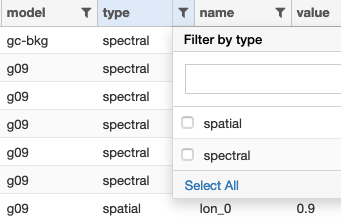

In [3]:
# Display thumbnails for nbsphinx-thumbnail
from IPython.display import Image

display(Image(filename="edit-interactive.png"))